In [10]:
# https://pythonmachinelearning.pro/clustering-with-gaussian-mixture-models/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.mixture import GaussianMixture
%matplotlib inline

In [11]:
cancer = load_breast_cancer()

X = scale(cancer.data)
#X = X[:,[0,1]]
print X.shape
y = pd.DataFrame(cancer.target)
variable_names = cancer.feature_names
y_list = y.values.flatten()

(569L, 30L)


In [12]:
gmm=GaussianMixture(n_components=2, covariance_type="full").fit(X)
labels = gmm.predict(X)
relabel = np.choose(labels,[1,0]).astype(np.int64)

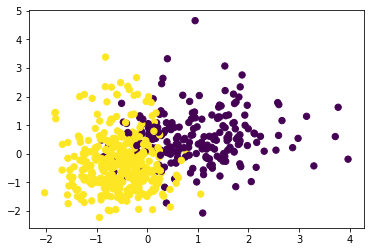

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_list, s=40, cmap='viridis');

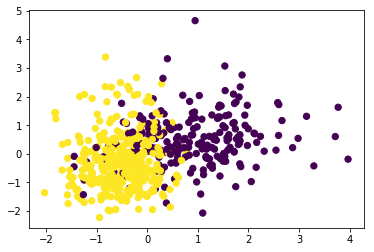

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=relabel, s=40, cmap='viridis');

In [15]:
print classification_report(y,relabel)

             precision    recall  f1-score   support

          0       0.91      0.92      0.92       212
          1       0.95      0.95      0.95       357

avg / total       0.94      0.94      0.94       569



In [16]:
confusion_matrix(y,relabel)

array([[196,  16],
       [ 19, 338]], dtype=int64)

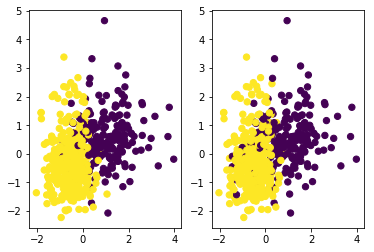

In [17]:
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y_list, s=40, cmap='viridis');

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=relabel, s=40, cmap='viridis');

In [19]:
print "ARI: ", sklearn.metrics.adjusted_rand_score(y.values.flatten(),relabel)

 ARI:  0.767829776843


In [20]:
#https://archive.ics.uci.edu/ml/datasets/Image+Segmentation

###########  image segmentation  ########

In [21]:
image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')


X = image[image.columns.difference(['CLASS'])]
y = image['CLASS']
y_list = y.values.flatten()
X[0:2]

#X = scale(cancer.data)
#y = pd.DataFrame(cancer.target)
variable_names = list(image.columns.values)
print 
print variable_names

#clustering = KMeans(n_clusters=7, random_state = 5)
#clustering.fit(X)

gmm=GaussianMixture(n_components=7, covariance_type="full").fit(X)


image_df = pd.DataFrame(image)
image_df.columns = variable_names
#y.columns = ['Targets']

image_target=image.CLASS.values
image_target = image_target -1


['CLASS', 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']


In [22]:
labels = gmm.predict(X)
#relabel = np.choose(labels,[1,0]).astype(np.int64)

Text(0.5,1,u'KMeans Classification')

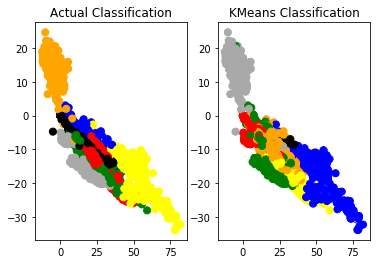

In [23]:
color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

plt.subplot(1,2,1)
plt.scatter(x=image_df['EXBLUE-MEAN'], y= image_df['EXGREEN-MEAN'], c=color_theme[image_target], s=50)
plt.title('Actual Classification')

plt.subplot(1,2,2)
plt.scatter(x=image_df['EXBLUE-MEAN'], y= image_df['EXGREEN-MEAN'], c=color_theme[labels], s=50)
plt.title('KMeans Classification')

#print classification_report(y,clustering.labels_)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00       330
          2       0.01      0.01      0.01       330
          3       0.00      0.00      0.00       330
          4       0.00      0.00      0.00       330
          5       0.16      0.16      0.16       330
          6       0.00      0.00      0.00       330
          7       0.00      0.00      0.00       330

avg / total       0.02      0.02      0.02      2310



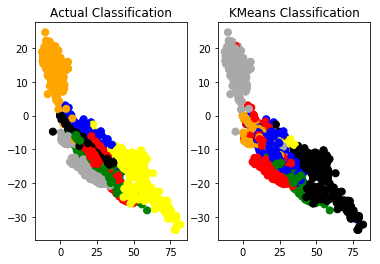

In [24]:
relabel = np.choose(labels,[0,3,4,5,1,6,2]).astype(np.int64)

# 1 goes in 5 spot
# 6 goes in 6 spot
# 4 goes in 3 spot
# 0 goes in 1 spot
# 2 goes in 7 spot
# 3 goes in 2 spot


plt.subplot(1,2,1)
plt.scatter(x=image_df['EXBLUE-MEAN'], y= image_df['EXGREEN-MEAN'], c=color_theme[image_target], s=50)
plt.title('Actual Classification')

plt.subplot(1,2,2)
plt.scatter(x=image_df['EXBLUE-MEAN'], y= image_df['EXGREEN-MEAN'], c=color_theme[relabel], s=50)
plt.title('KMeans Classification')

print classification_report(y,relabel)

In [25]:
confusion_matrix(y,relabel)

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   4,   0,   0, 185, 141,   0],
       [  0,   0,   2,   0, 328,   0,   0,   0],
       [  0,   9,  81,   0,   0,  77, 163,   0],
       [  0,   0,  87, 216,   0,  25,   2,   0],
       [  1,   0,  77,  15,   0,  54, 183,   0],
       [ 16,   0,  56, 258,   0,   0,   0,   0],
       [324,   0,   1,   0,   0,   5,   0,   0]], dtype=int64)

In [26]:
print "ARI: ", sklearn.metrics.adjusted_rand_score(y.values.flatten(),relabel)

ARI:  0.481824567468
